20250725 - 하나의 코드로 합치기

In [4]:
import os
import sys
import json
import urllib.parse
import urllib.request
import requests
from bs4 import BeautifulSoup
from dotenv import load_dotenv

load_dotenv()

####################### NAVER API 이용해서 기사 가져오기
# 1. 정보입력
client_id = os.getenv("NAVER_CLIENT_ID")
client_secret = os.getenv("NAVER_CLIENT_SECRET")

# 2. 키워드 입력
keyword = "소방청 대형화재사고"

# 3. 키워드 인코딩
encText = urllib.parse.quote(keyword)

# 4. URL 생성
url = "https://openapi.naver.com/v1/search/news?query=" + encText

# 4-1 옵션 추가 (한 번에 표시할 검색 결과 개수 : display)
url = url + "&display=100"

# 5. 데이터 요청 준비
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)

# 6. 데이터 요청
response = urllib.request.urlopen(request)
rescode = response.getcode()
if (rescode == 200) :
    response_body = response.read()
    # print(response_body.decode('utf-8'))
else :
    print("ERROR CODE : " + rescode)

# items 안에 있는 전체데이터 가져오기 (full_data)
result = json.loads(response_body.decode('utf-8'))
full_data = result["items"]

# full_data에서 link 본문 내용만 가져오기 (link_data)
link_data = []
main_news = "n.news.naver"

for data in full_data :
    if main_news in data.get("link") :
        link_data.append(data.get("link"))


####################### Beautifulsoup
remove_tag = ["strong", "div", "span"]      # 제거할 태그들을 리스트로 담는다
articles = []

for link in link_data :
    url = link
    texts = get_article_text(link, remove_tag)
    articles.append(texts)

articles

["\n(서울=뉴스1) 구진욱 기자 = 소방청이 대형·복잡 화학사고에 대응할 수 있는 실전형 전문인력 21명을 선발했다. 소방청은 지난 9일부터 11일까지 중앙소방학교에서 '제6회 화학사고 대응능력 1급 실기시험'을 실시해 최종 21명의 1급 자격자를 배출했다고 22일 밝혔다. 이번 시험에는 전국 소방공무원 93명이 응시했으며, 이 중 22.6%가 최종 합격했다.해당 시험은 단순 자격 부여가 아닌, 현장에서의 실질적인 대응역량을 검증하는 데 중점을 둔 고난도 실기 평가다. 1급 자격은 누출 방지 및 제독소 운영까지 가능한 최고 단계의 전문 자격으로, 2급 취득 후 일정 요건을 갖춘 자에 한해 응시할 수 있다.실기평가는 총 6개 과목으로 구성됐다. 공통 과제로는 △화학물질 식별 및 정보 확인 △A급 보호복 착용 후 인명구조 △C급 보호복 착용 후 경계구역 설정이 포함됐고, 추첨 과제로는 △누출 방지 작업 △고압 누출 차단 △간이 인체 제독 텐트 운용 등이 출제됐다. 100점 만점 기준, 평균 70점 이상이면서 과목별 40점 이상을 받아야 합격할 수 있다.이번 자격시험은 화학사고 대응 전문성을 강화하기 위해 2022년부터 도입된 제도로, 2018년 고양 저유소 화재 사고를 계기로 마련됐다. 소방청은 이론뿐만 아니라 실제 장비 운용 능력, 상황 판단력 등 현장성을 종합적으로 평가했다고 설명했다.2024년 기준 화학사고는 전국에서 195건 발생했으며, 5명이 사망하고 115명이 부상을 입었다. 주요 원인 물질은 수은(21건), 산성·염기성 물질 순으로 집계됐다. 특히 수은 사고의 57%는 초‧중등 교육기관에서, 38%는 병원에서 발생한 것으로 나타났다.지역별 합격자는 △경남 4명 △서울·경북 각 3명 △전남·대구·광주 각 2명 △중부·경기·충남·전북·창원 각 1명으로 전국 고르게 분포됐다.소방청은 향후 시험 결과를 바탕으로 평가 체계를 분석하고 후속 교육을 강화해 전국 소방조직의 화학사고 대응 역량을 높여나간다는 방침이다.\n\t\t",
 '\n[이데일리 박태진 기자

In [3]:
# 네이버기사 링크를 넣으면 본문 내용만 반환하는 함수
def get_article_text(link, remove_tag) :

    import requests
    from bs4 import BeautifulSoup

    url = link
    response = requests.get(url)

    html = response.text
    soup = BeautifulSoup(html)

    # 기사 본문 내용만 가져오기
    article_texts = soup.find("article")

    # 불필요 태그 제거 (strong, div, span)
    for tag in article_texts(remove_tag):
        tag.decompose()

    # article 태그 안 내용만 가져오기
    article_text = article_texts.get_text()

    return article_text

# 데이터 전처리

데이터 전처리는 리스트 형태가 좋다 (문자열보다)

정규식
- 이메일 제거
    `
    re.sub(r'\b[\w.-]+@[\w.-]+\.\w+\b', '', string)
    `
- \n\t\r 태그 제거
    `
    re.sub(r'[\n\t\r]', '', string)
    `
- 도형 제거 (△)
    `
    re.sub(r'[\u25A0-\u25FF]', '', string)
    `
- 공백 제거 (\xa0 포함)
    `
   re.sub(r'\s+', ' ', string)
    `

In [16]:
from konlpy.tag import Okt
import re

okt = Okt()
word_list = []
stopwords = []

for i, article in enumerate(articles) :

    # 데이터 전처리
    article = re.sub("[^a-zA-Z가-힣\s]", "", article)
    article = re.sub(r'[\n\t\r]', '', article).strip()
    article = re.sub(r'[\u25A0-\u25FF]', '', article).strip()
    article = re.sub(r'\b[\w.-]+@[\w.-]+\.\w+\b', '', article)
    article = re.sub(r'\s+', ' ', article)

    # 형태소 분석
    result = okt.morphs(article)
    # print(f"{i}번째 리뷰 : {result}")

    # 조건에 맞는 단어 담기
    for word in result :
        if len(word) > 1 and word not in stopwords :
            word_list.append(word)
    
print(word_list)

['서울', '뉴스', '진욱', '기자', '소방청', '대형', '복잡', '화학', '사고', '대응', '있는', '실전', '전문', '인력', '선발', '했다', '소방청', '지난', '부터', '까지', '중앙', '소방', '학교', '에서', '화학사', '대응', '능력', '실기', '시험', '실시', '최종', '명의', '자격', '배출', '했다고', '밝혔다', '이번', '시험', '에는', '전국', '소방', '공무원', '응시', '했으며', '최종', '합격', '했다', '해당', '시험', '단순', '자격', '부여', '아닌', '현장', '에서의', '실질', '대응', '역량', '검증', '하는', '중점', '고난', '실기', '평가', '자격', '방지', '독소', '운영', '까지', '가능한', '최고', '단계', '전문', '자격', '으로', '취득', '일정', '요건', '갖춘', '한해', '응시', '있다실기', '평가', '과목', '으로', '구성', '됐다', '공통', '과제', '로는', '화학물질', '식별', '정보', '확인', '보호복', '착용', '인명구조', '보호복', '착용', '경계', '구역', '설정', '포함', '됐고', '추첨', '과제', '로는', '방지', '작업', '고압', '차단', '간이', '인체', '제독', '텐트', '운용', '출제', '됐다', '만점', '기준', '평균', '이상', '이면', '과목', '이상', '받아야', '합격', '있다', '이번', '자격시험', '화학사', '대응', '전문성', '강화하기', '위해', '부터', '도입', '제도로', '고양', '유소', '화재', '사고', '계기', '마련', '됐다', '소방청', '이론', '아니라', '실제', '장비', '운용', '능력', '상황', '판단력', '현장', '종합', '으로', '평가', '했다고', '설명', '다년', '기준'

[('화재', 205), ('으로', 170), ('에서', 166), ('소방', 155), ('했다', 120), ('대응', 83), ('하는', 82), ('하고', 82), ('발생', 79), ('이다', 71), ('있다', 70), ('사고', 59), ('지원', 58), ('센터', 57), ('까지', 56), ('있는', 52), ('단계', 52), ('안전', 52), ('심리', 51), ('재난', 49), ('전기차', 49), ('설치', 46), ('소방청', 45), ('대형', 45), ('피해', 44), ('병원', 43), ('됐다', 42), ('정부', 42), ('에는', 41), ('위험', 41), ('공무원', 40), ('상담', 40), ('상황', 39), ('공장', 39), ('현장', 35), ('산불', 34), ('되는', 33), ('건강', 31), ('로봇', 31), ('마음', 30), ('전국', 29), ('구조', 29), ('한다', 29), ('스프링클러', 28), ('회복', 27), ('부분', 27), ('때문', 27), ('경우', 27), ('전지', 27), ('동원령', 27)]


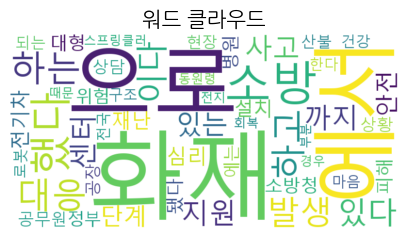

In [18]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
from PIL import Image
import numpy as np

counter50 = Counter(word_list)
print(counter50.most_common(50))

wc50 = WordCloud(
    font_path = "C:\Windows\Fonts\malgun.ttf",
    background_color="white",
    width=800,
    height=400
)

# wc50.generate_from_frequencies(counter50.most_common(50))  -> most_common() 쓰면 list 형태로 나오기 때문에 에러남 (dict 형태가 되어야함)
wc50.generate_from_frequencies(dict(counter50.most_common(50)))

plt.figure(figsize=(5,5))
plt.imshow(wc50, interpolation="bilinear")
plt.axis("off")
plt.title("워드 클라우드", fontsize =15)
plt.show()